<a href="https://www.kaggle.com/code/shravankumar147/control-image-generation-controlnet?scriptVersionId=204618330" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Control image generation 
Trying to generate an image that looks exactly the way you want can be difficult, which is why controlled generation techniques and models are so useful. While you can use the negative_prompt to partially control image generation, there are more robust methods like prompt weighting and ControlNets.

# ControlNet
ControlNets provide a more flexible and accurate way to control image generation because you can use an additional conditioning image. The conditioning image can be a canny image, depth map, image segmentation, and even scribbles! Whatever type of conditioning image you choose, the ControlNet generates an image that preserves the information in it.

For example, let’s condition an image with a depth map to keep the spatial information in the image.

In [1]:
!pip install --upgrade diffusers[torch] --q

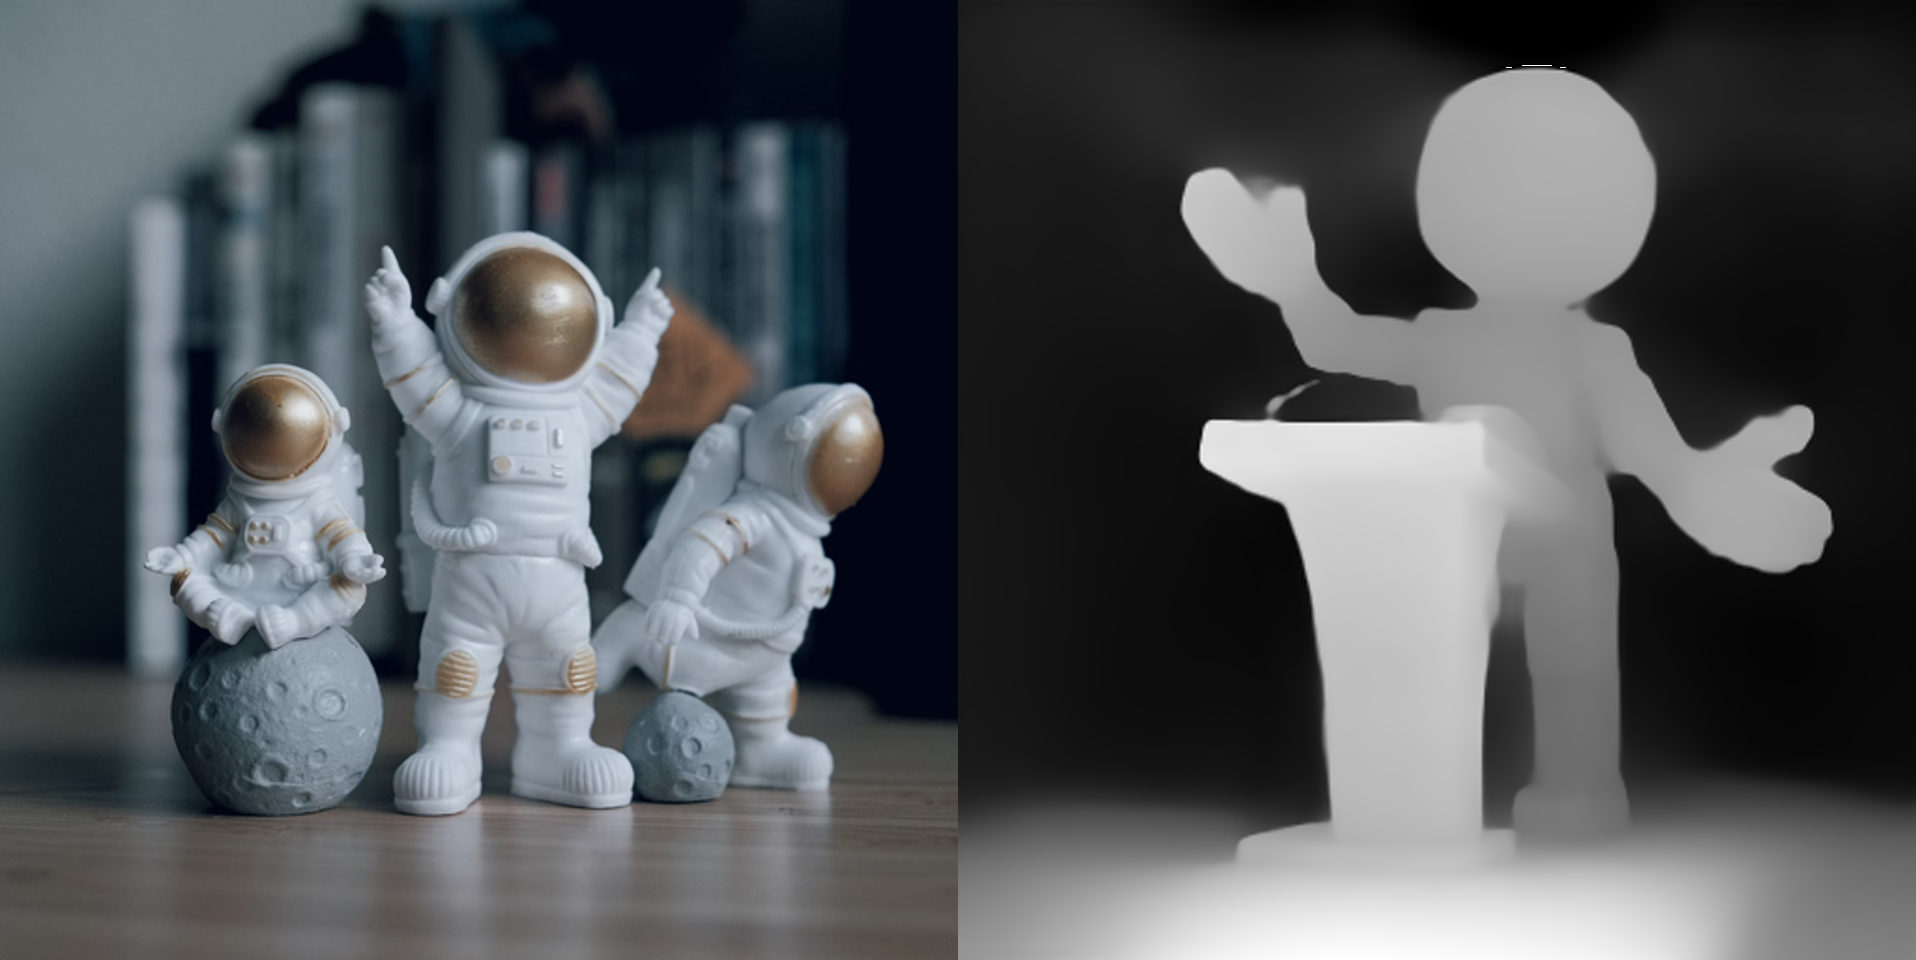

In [2]:
from diffusers.utils import load_image, make_image_grid

# prepare image
url = "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/diffusers/img2img-init.png"
init_image = load_image(url)
init_image = init_image.resize((958, 960)) # resize to depth image dimensions
depth_image = load_image("https://huggingface.co/lllyasviel/control_v11f1p_sd15_depth/resolve/main/images/control.png")
make_image_grid([init_image, depth_image], rows=1, cols=2)

Load a ControlNet model conditioned on depth maps and the AutoPipelineForImage2Image:

In [3]:
from diffusers import ControlNetModel, AutoPipelineForImage2Image
import torch

controlnet = ControlNetModel.from_pretrained("lllyasviel/control_v11f1p_sd15_depth", torch_dtype=torch.float16, variant="fp16", use_safetensors=True)
pipeline = AutoPipelineForImage2Image.from_pretrained(
    "stable-diffusion-v1-5/stable-diffusion-v1-5", controlnet=controlnet, torch_dtype=torch.float16, variant="fp16", use_safetensors=True
)
pipeline.enable_model_cpu_offload()
# remove following line if xFormers is not installed or you have PyTorch 2.0 or higher installed
# pipeline.enable_xformers_memory_efficient_attention()

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

config.json:   0%|          | 0.00/945 [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/723M [00:00<?, ?B/s]

model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

scheduler/scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/608M [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Now generate a new image conditioned on the depth map, initial image, and prompt:

  0%|          | 0/40 [00:00<?, ?it/s]

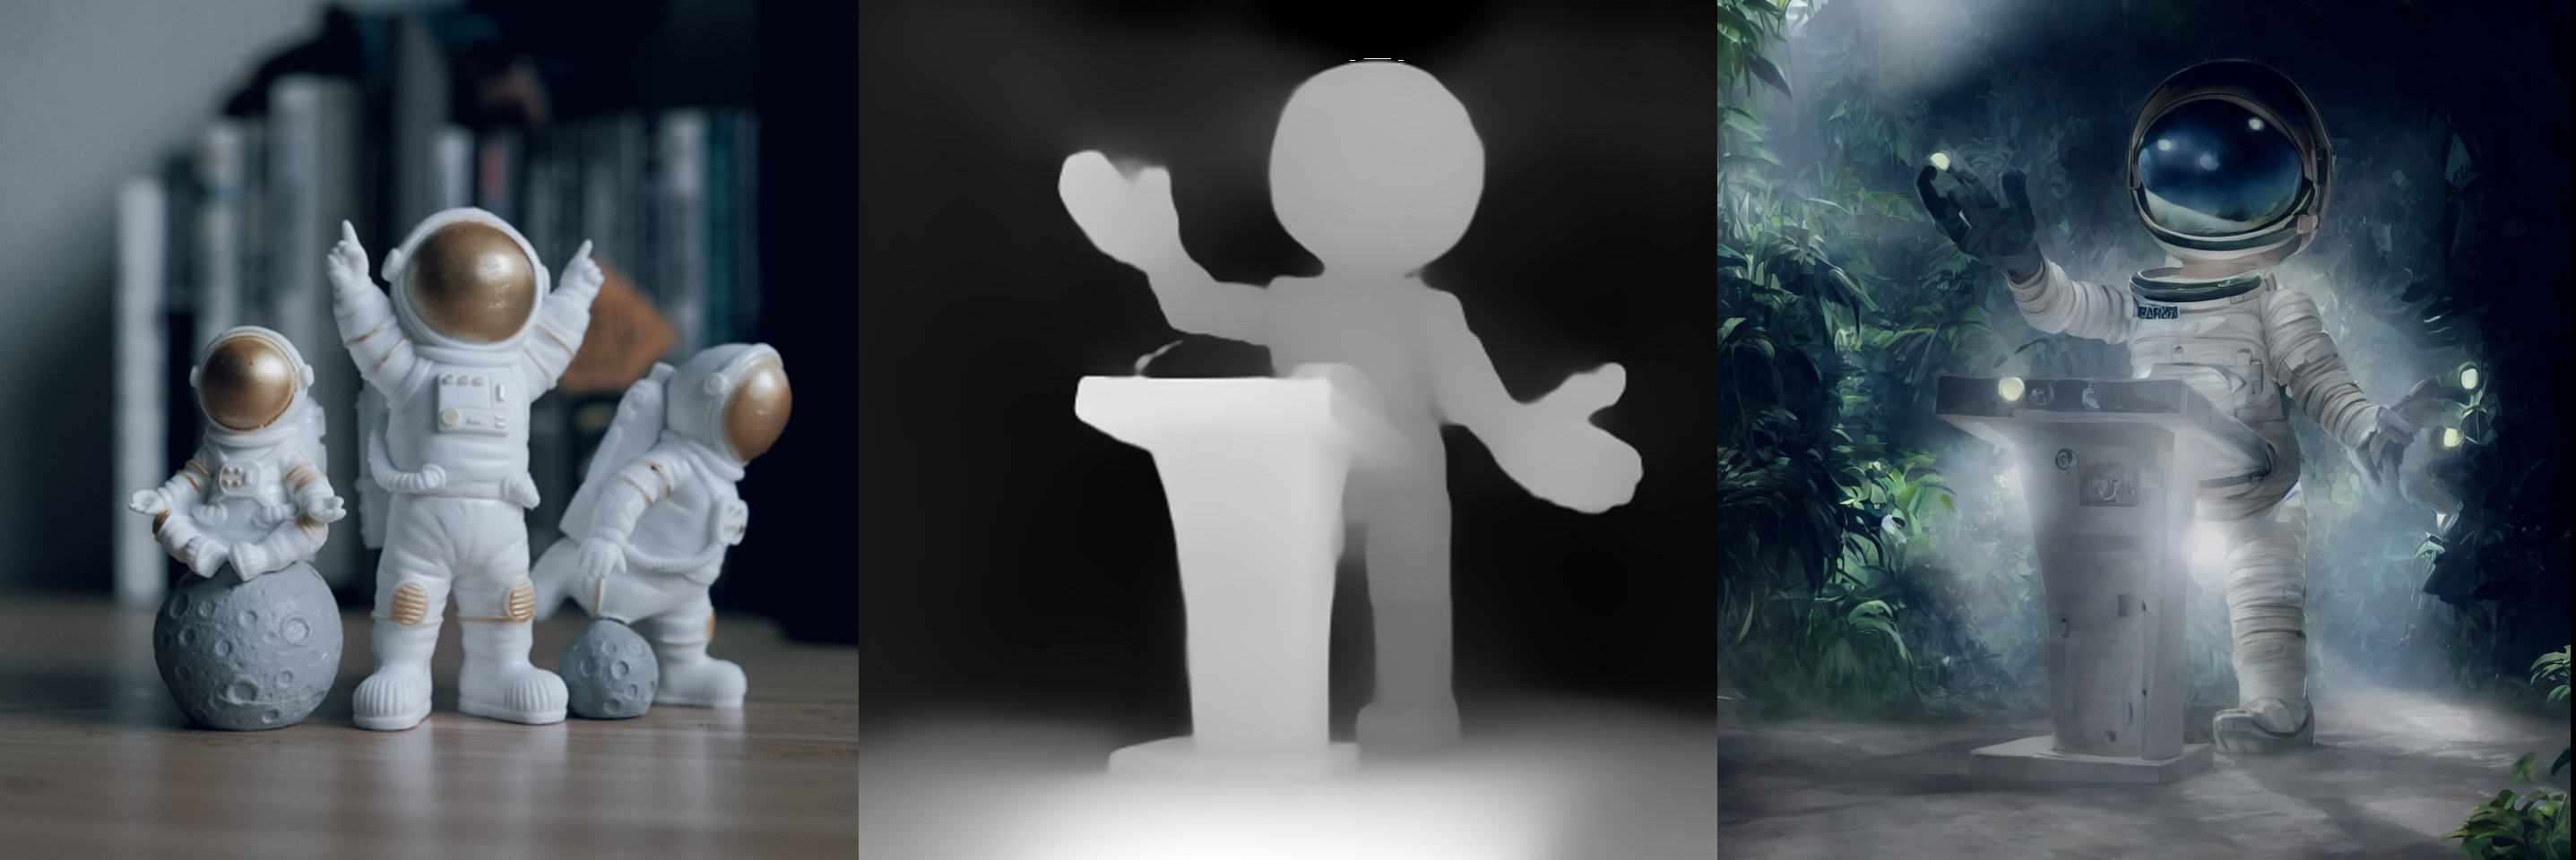

In [4]:
prompt = "Astronaut in a jungle, cold color palette, muted colors, detailed, 8k"
image_control_net = pipeline(prompt, image=init_image, control_image=depth_image).images[0]
make_image_grid([init_image, depth_image, image_control_net], rows=1, cols=3)

Let’s apply a new style to the image generated from the ControlNet by chaining it with an image-to-image pipeline:

model_index.json:   0%|          | 0.00/546 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.84k [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/748 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/581 [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/335M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/492M [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

An error occurred while trying to fetch /root/.cache/huggingface/hub/models--nitrosocke--elden-ring-diffusion/snapshots/9a62d6f236829197d4aa9f314c7e488cbe3531d1/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--nitrosocke--elden-ring-diffusion/snapshots/9a62d6f236829197d4aa9f314c7e488cbe3531d1/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--nitrosocke--elden-ring-diffusion/snapshots/9a62d6f236829197d4aa9f314c7e488cbe3531d1/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--nitrosocke--elden-ring-diffusion/snapshots/9a62d6f236829197d4aa9f314c7e488cbe3531d1/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


  0%|          | 0/22 [00:00<?, ?it/s]

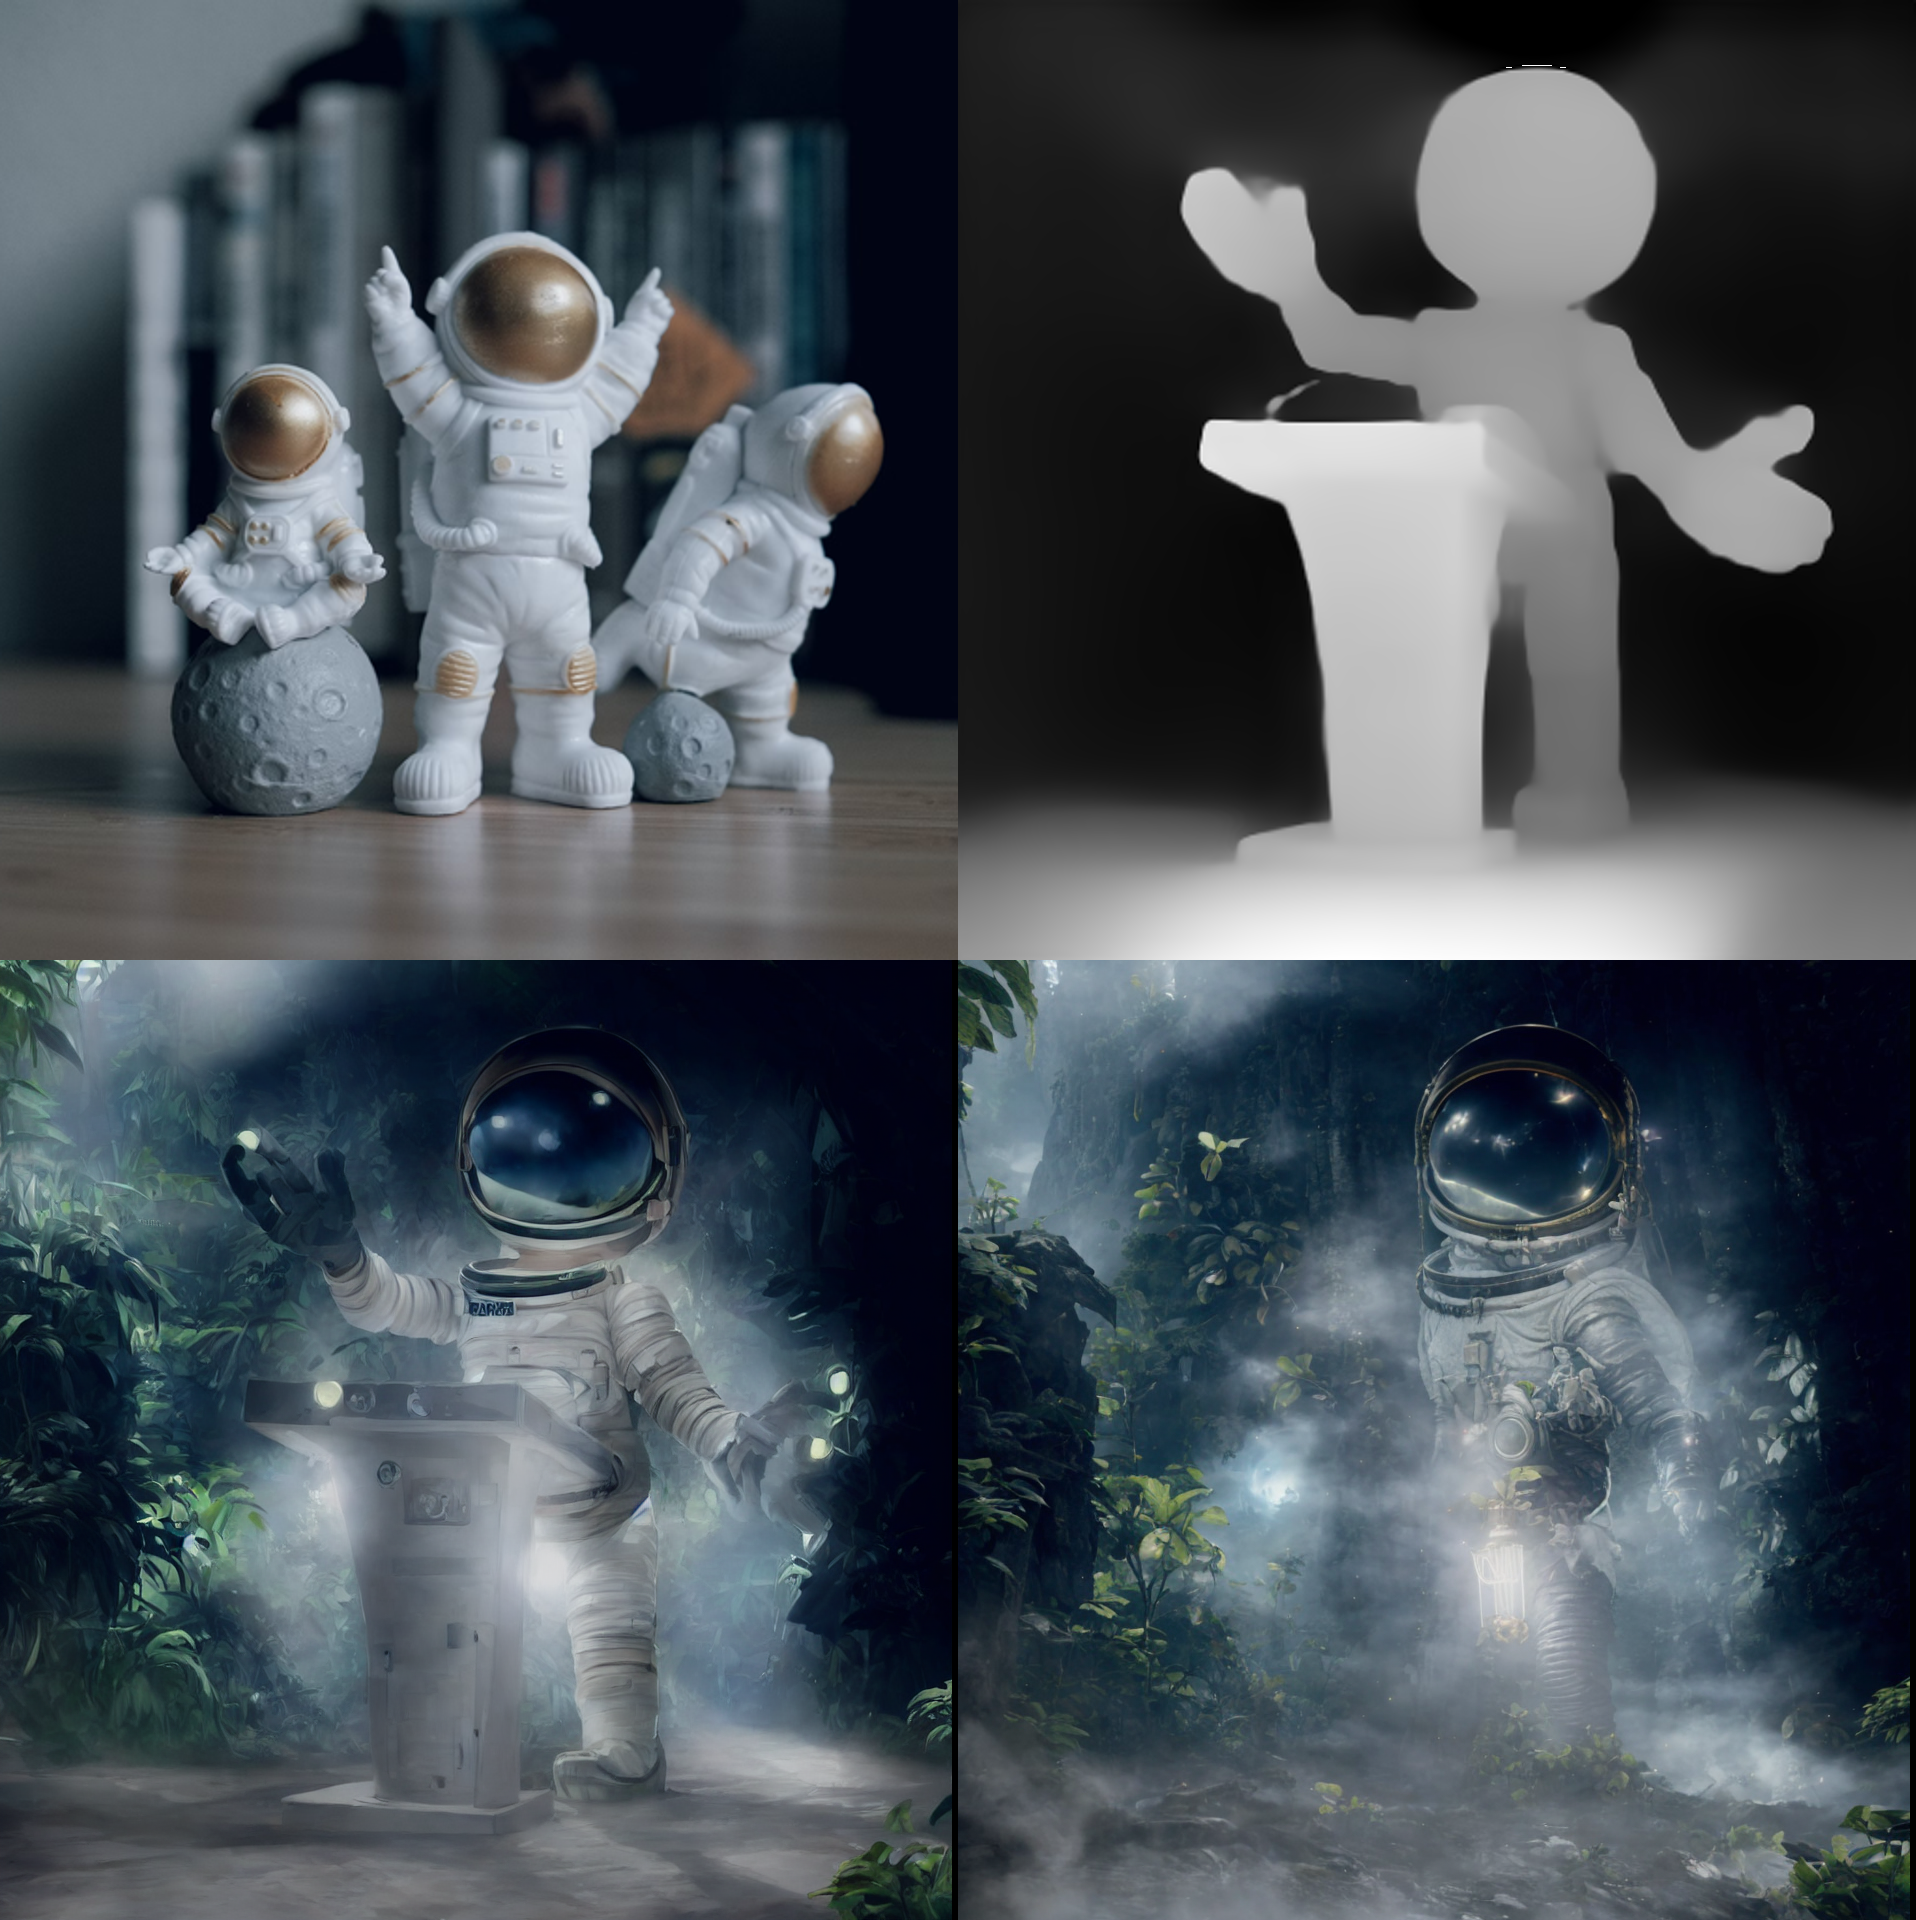

In [5]:
pipeline = AutoPipelineForImage2Image.from_pretrained(
    "nitrosocke/elden-ring-diffusion", torch_dtype=torch.float16,
)
pipeline.enable_model_cpu_offload()
# remove following line if xFormers is not installed or you have PyTorch 2.0 or higher installed
# pipeline.enable_xformers_memory_efficient_attention()

prompt = "elden ring style astronaut in a jungle" # include the token "elden ring style" in the prompt
negative_prompt = "ugly, deformed, disfigured, poor details, bad anatomy"

image_elden_ring = pipeline(prompt, negative_prompt=negative_prompt, image=image_control_net, strength=0.45, guidance_scale=10.5).images[0]
make_image_grid([init_image, depth_image, image_control_net, image_elden_ring], rows=2, cols=2)

In [6]:
pipeline

StableDiffusionImg2ImgPipeline {
  "_class_name": "StableDiffusionImg2ImgPipeline",
  "_diffusers_version": "0.31.0",
  "_name_or_path": "nitrosocke/elden-ring-diffusion",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}